# Santander Customer Transaction Prediction

#### 1. Introduction

1.1. Project's goal
    
1.2. Outcome evaluation

1.3. Data
    
#### 2. Exploratory Data Analysis
    
2.1. Data Collection
    
2.2. Data Exploration
    
2.3. Data Preparation
  

#### 3. Model

3.1. SGD Classifier 
    
3.2. Logistic Regression
    
3.3. Random Forest Classifier
    
3.4. Neural Network
    
3.5. LightGBM
 
#### 4. Final results

#### 5. Conclusion

## 1. Introduction

### 1.1. Project's Goal

Santander works on improving their machine learning algorithms to solve their most common challenges (binary classification problems) and find the answers for such questions as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this project Santander invite Kagglers to help answer the question: which customers will make a specific transaction in the future, irrespective of the amount of money transacted. Thus the goal is to create a model that will hep to make a binary prediction of the target variable.

### 1.2. Data

The data provided for this project is annonimyzed, but has the same structure as the real data. The data consists of two files:

- train.csv - the training set.
- test.csv - the test set. The test set contains some rows which are not included in scoring.

The dataset contains numeric feature variables, the binary target column (only in training set) and a string ID_code column. The task is to predict the value of target column in the test set.

### 1.3. Outcome evaluation

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

In the following step we will load the data, explore and prepare it for a model.

## 2. Exploratory Data Analysis

### 2.1. Data Collection

In [1]:
# Let's start with importing all ncessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import cross_val_predict

In [2]:
#Let's load train and test data files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 2.2. Data Exploration

In [3]:
#Let's check the datasets
print(train.shape)
print(test.shape)

(200000, 202)
(200000, 201)


In [4]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


Both datasets have 200000 rows. The test set has one column less, because it doesn't have the target column. Each set has 200 numerical variable columns (from var_0 to var_199) and one ID_code column.

In [6]:
#Let's check if there are any missing data 
missing_train = train.isnull().sum()
i=0
for v in missing_train:
    if v !=0:
        print(v)
        i+=1
print(i)

0


In [7]:
missing_test = test.isnull().sum()
i=0
for v in missing_test:
    if v !=0:
        print(v)
        i+=1
print(i)

0


There are no missing values in our datasets.

In [8]:
#Let's see what data types do we deal with
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [10]:
#Let's check what do the statistics say about our data
pd.set_option('display.max_columns', None)
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [11]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000

- It looks like the measures are very similar for both datasets. 
- The range of mean value is pretty high as well as standard deviation.

<Figure size 432x288 with 0 Axes>

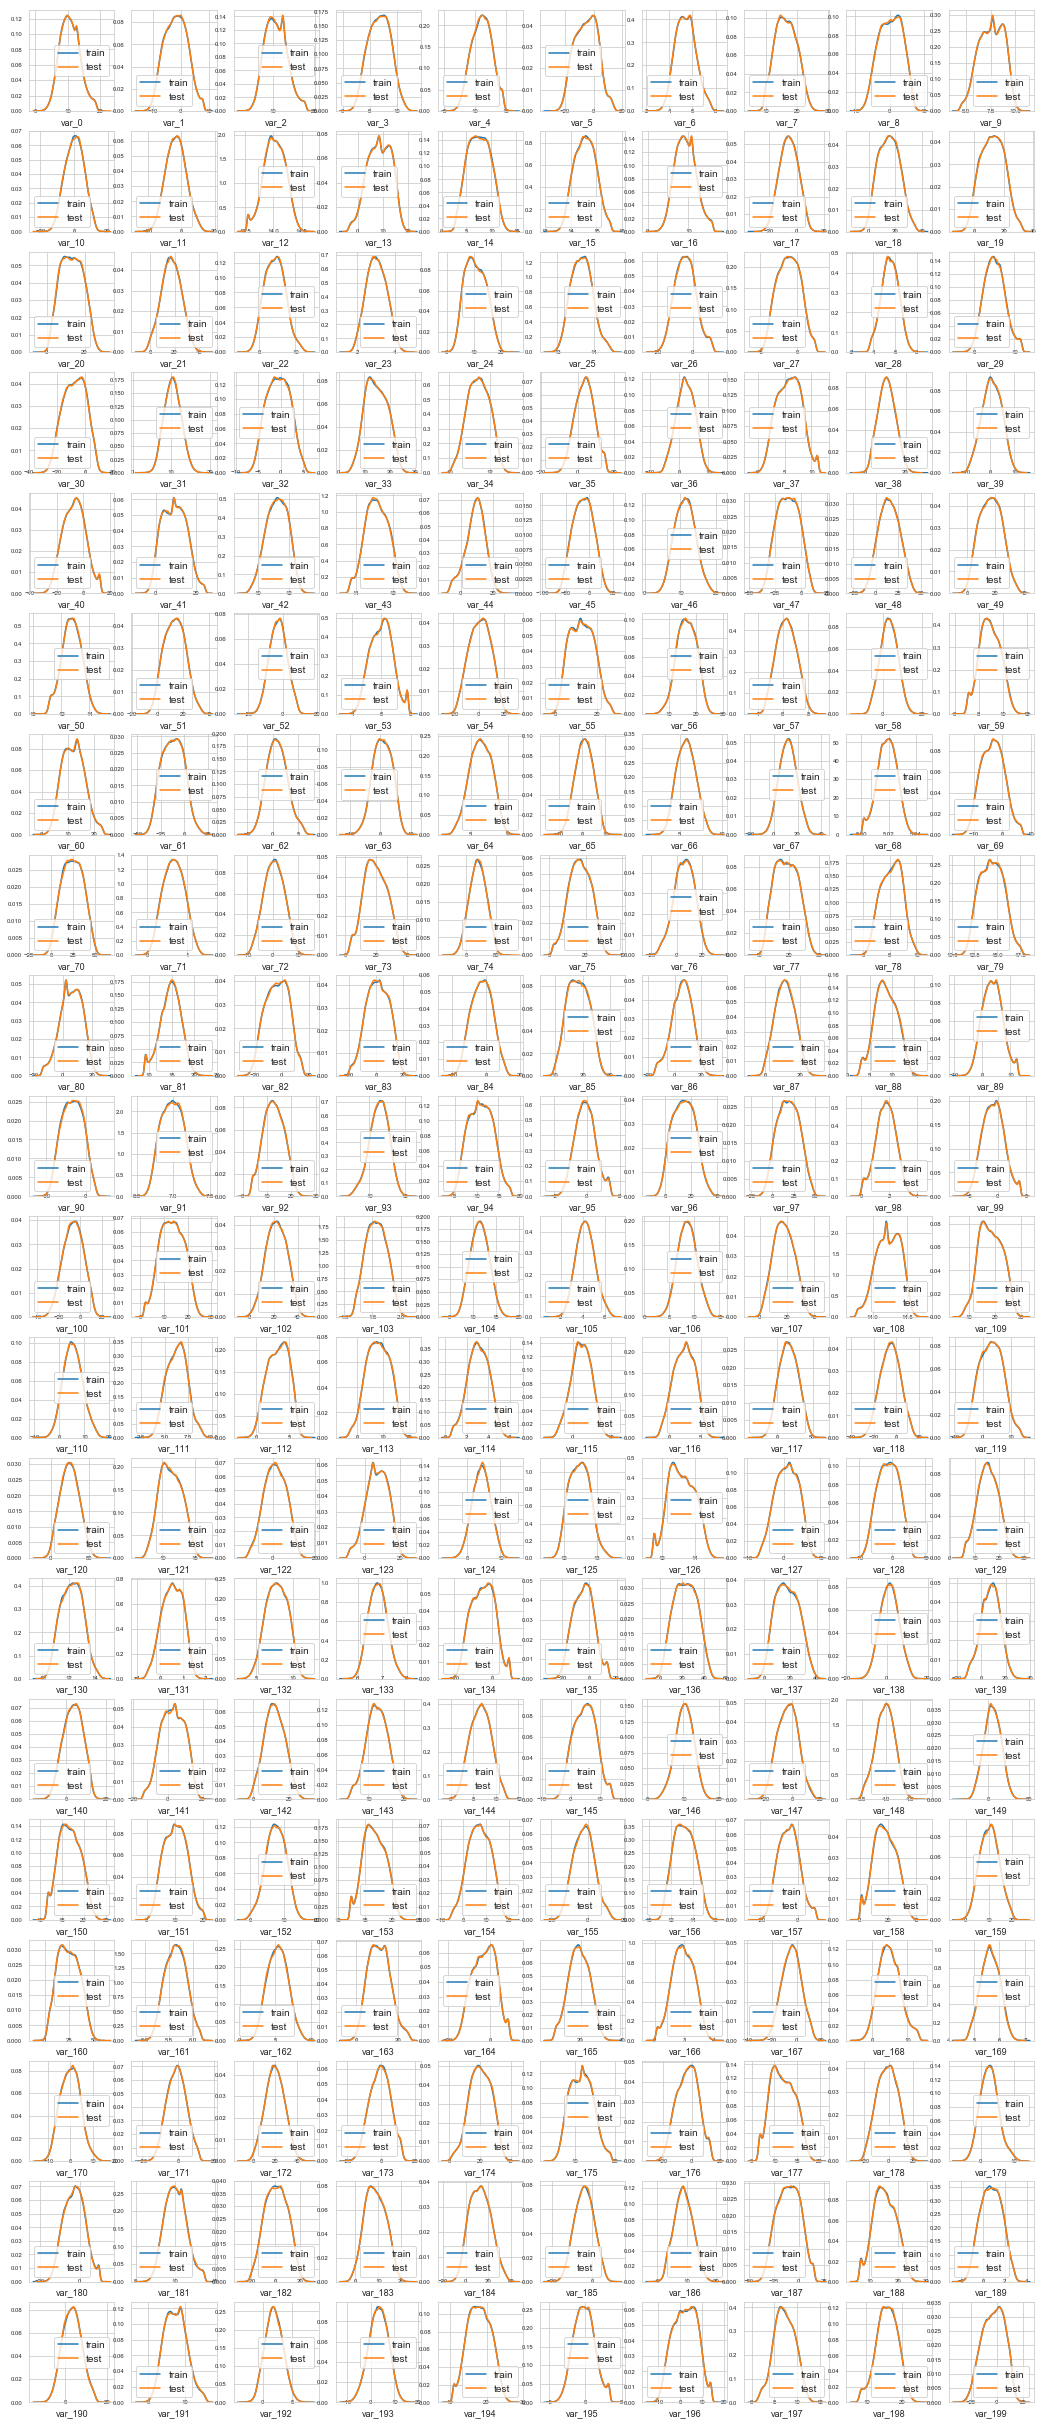

In [12]:
#Let's check if variables in train and test are well balanced by comparing distribution plots
import seaborn as sns
features = train.columns.values[2:]
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(20,10,figsize=(18,44))

for feature in features:
    i += 1
    plt.subplot(20,10,i)
    sns.distplot(train[feature],hist=False,label='train')
    sns.distplot(test[feature], hist=False,label='test')
    plt.xlabel(feature, fontsize=9)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', labelsize=6, pad=-6)
    plt.tick_params(axis='y', labelsize=6)
plt.show()

From what we can observe on the graphs both data sets are well balanced. Let's compare now the distribution of our variables values with target value 0 and 1.

<Figure size 432x288 with 0 Axes>

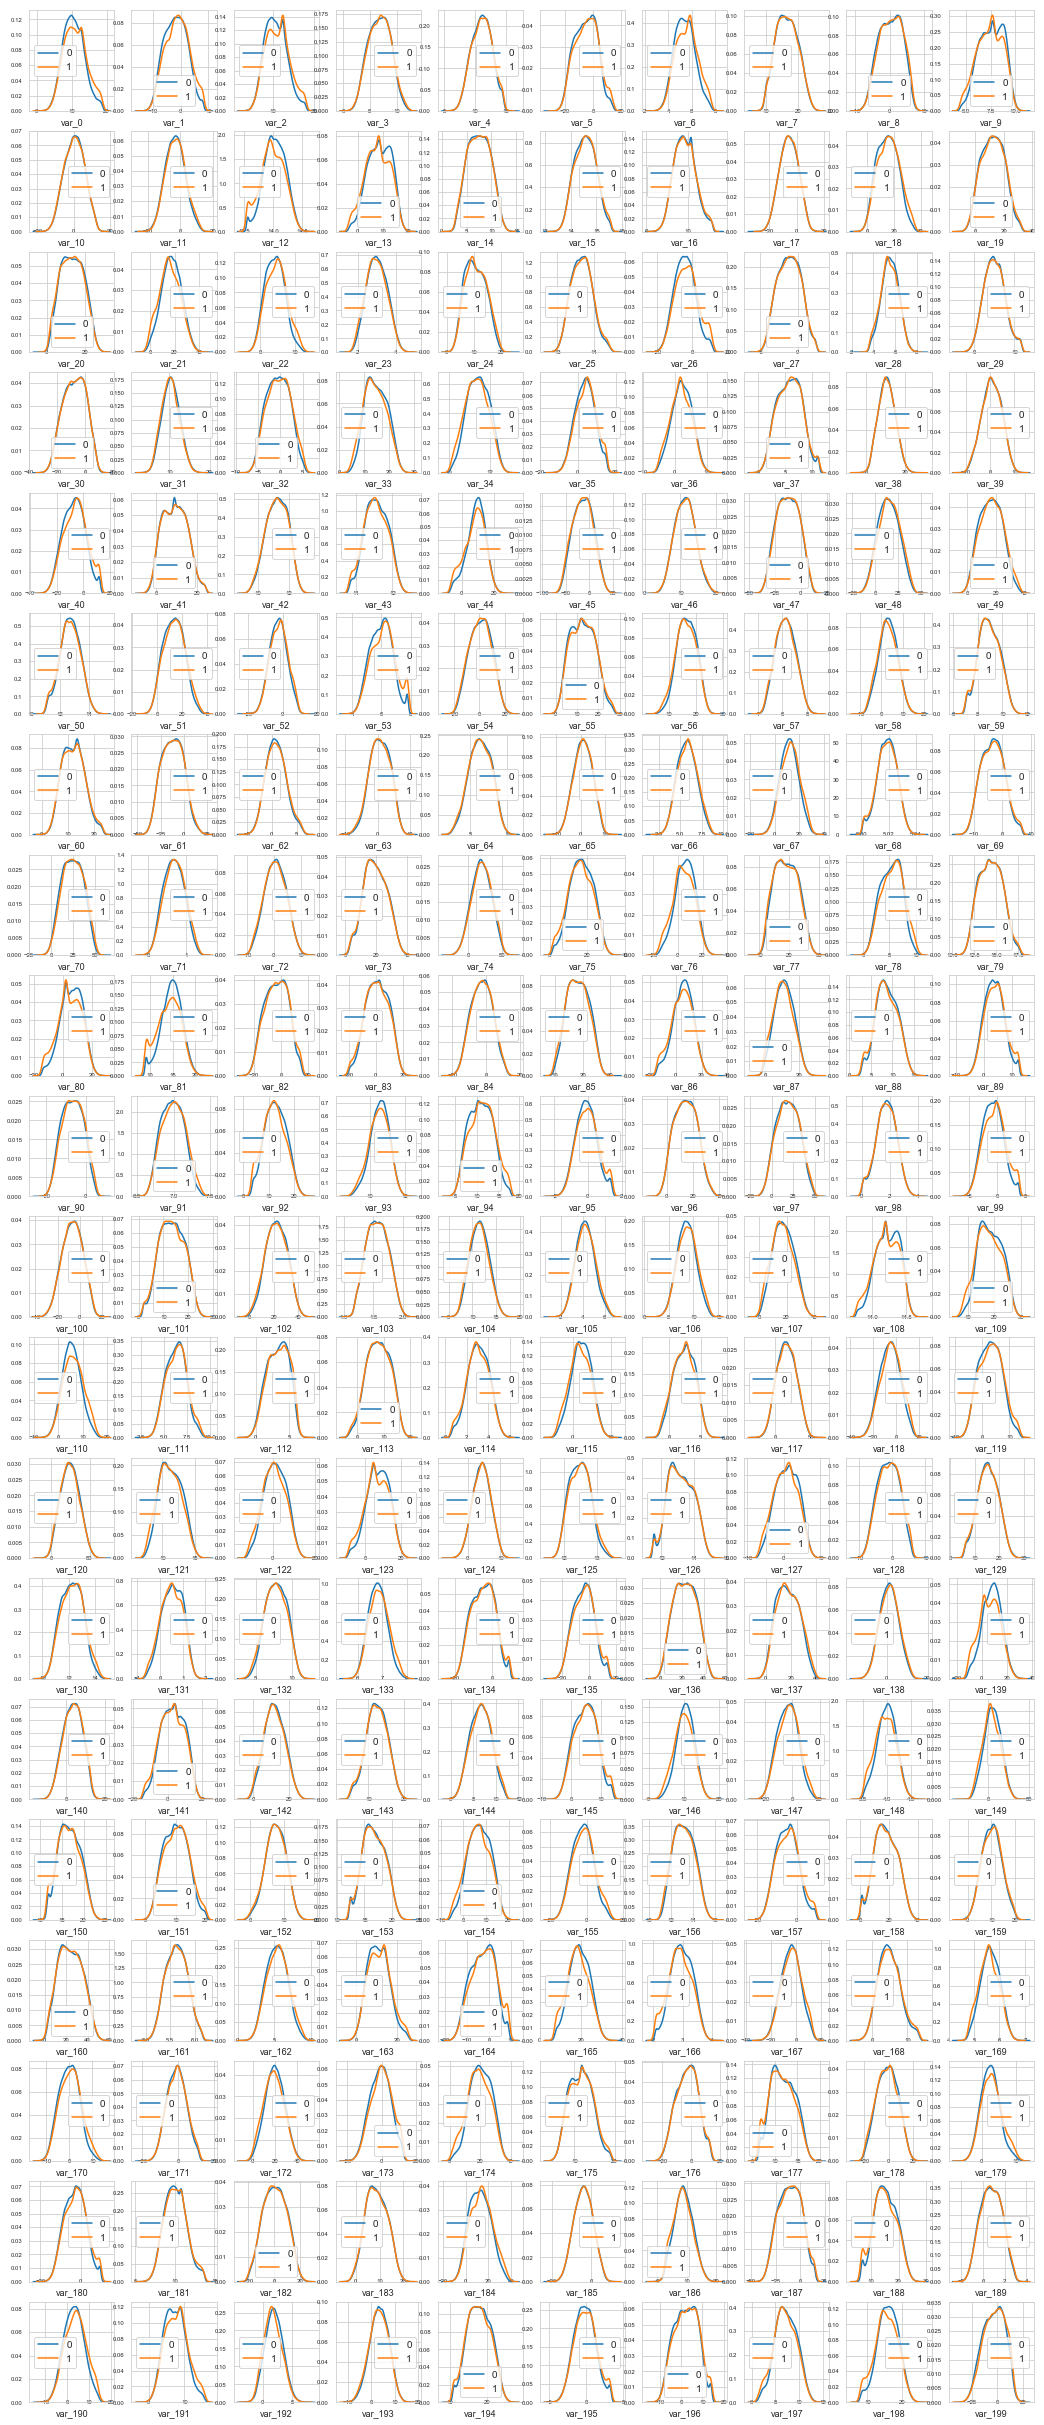

In [13]:
#Let's compare now the distribution of our variables values with target value 0 and 1.
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(20,10,figsize=(18,44))

for feature in features:
    i += 1
    plt.subplot(20,10,i)
    sns.distplot(train.loc[train['target'] == 0][feature],hist=False,label='0')
    sns.distplot(train.loc[train['target'] == 1][feature], hist=False,label='1')
    plt.xlabel(feature, fontsize=9)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', labelsize=6, pad=-6)
    plt.tick_params(axis='y', labelsize=6)

plt.show()

We can observe that the distributino for some variables is different for 0 and for 1. That information might be usefull for selecting the features for our model.

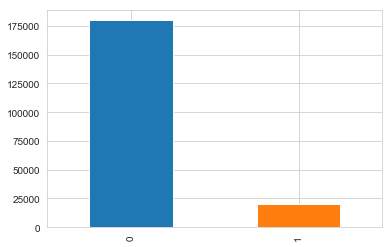

In [14]:
#Let's check the distribution of our target values
train['target'].value_counts().plot.bar()

In [15]:
train["target"].value_counts()

0    179902
1     20098
Name: target, dtype: int64

Defenietly the values of the target column are imbalanced (there is much more zeros than ones).

### 2.3. Data Preparation

In [16]:
#Let's start with extracting the columns names
all_columns = train.columns
train_columns = all_columns[2:]
target_column = all_columns[1]
print(train_columns)
print(target_column)

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)
target


In [17]:
#Now we are going to normalize both data sets: train and test
target = train['target']
id = train['ID_code']
train_norm = (train[train_columns] - train[train_columns].min())/(train[train_columns].max()-train[train_columns].min())
train_norm['target'] = target
train_norm['ID_code'] = id
train_norm.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target,ID_code
0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,0.270395,0.247420,0.600396,0.676400,0.474711,0.232357,0.559134,0.535530,0.295319,0.498814,0.285205,0.906070,0.434859,0.444895,0.396726,0.344246,0.576530,0.368293,0.478336,0.612068,0.424169,0.601423,0.683647,0.596934,0.323936,0.548632,0.396180,0.712154,0.392624,0.695207,0.304304,0.616714,0.562163,0.458493,0.589446,0.722975,0.488978,0.546391,0.234790,0.489569,0.510777,0.272145,0.513798,0.791101,0.574568,0.374227,0.470293,0.566235,0.323233,0.339226,0.441879,0.677719,0.669817,0.708271,0.596911,0.474569,0.740212,0.792107,0.533499,0.712175,0.322034,0.467013,0.474463,0.440058,0.662686,0.227822,0.739787,0.525368,0.344031,0.679298,0.633169,0.225303,0.653124,0.402080,0.604663,0.523014,0.472202,0.558151,0.531146,0.596173,0.412696,0.314735,0.452511,0.267438,0.432284,0.370965,0.744188,0.616939,0.398247,0.474799,0.543995,0.312972,0.756458,0.466271,0.577769,0.381181,0.711395,0.825873,0.598691,0.440981,0.376134,0.707243,0.391949,0.600316,0.568186,0.185866,0.387989,0.444888,0.506447,0.490566,0.383901,0.669532,0.374272,0.310992,0.477752,0.335566,0.511474,0.237730,0.609783,0.418142,0.455886,0.456965,0.604336,0.417368,0.706089,0.409553,0.795799,0.653778,0.610643,0.759929,0.546837,0.643774,0.650336,0.272817,0.654250,0.425425,0.511263,0.685405,0.556649,0.259168,0.494519,0.659573,0.572797,0.556335,0.558938,0.436598,0.594172,0.607620,0.335113,0.281959,0.449180,0.543785,0.347928,0.316133,0.314657,0.339334,0.830517,0.256340,0.358433,0.616147,0.737390,0.434280,0.311849,0.347898,0.497048,0.622578,0.463174,0.255534,0.384752,0.560712,0.435670,0.449490,0.391869,0.400996,0.526098,0.672579,0.705287,0.799861,0.600263,0.397474,0.528213,0.476595,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.560645,0,train_0
1,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,0.660911,0.573056,0.515922,0.789061,0.483072,0.508937,0.317515,0.223730,0.761884,0.339565,0.352288,0.861046,0.241322,0.216962,0.696636,0.589786,0.293071,0.605293,0.312507,0.383447,0.441458,0.297558,0.505446,0.318052,0.651231,0.637080,0.447521,0.453532,0.487657,0.538568,0.474359,0.610151,0.451955,0.299954,0.220904,0.587710,0.253400,0.281434,0.306934,0.700305,0.745799,0.686141,0.293773,0.507252,0.492922,0.684239,0.337555,0.680831,0.629367,0.624191,0.438938,0.462578,0.370438,0.547535,0.576836,0.424110,0.680413,0.523985,0.485161,0.466206,0.531073,0.745859,0.706705,0.410602,0.586186,0.471249,0.401305,0.222

In [18]:
id = test['ID_code']
test_norm = (test[train_columns] - test[train_columns].min())/(test[train_columns].max()-test[train_columns].min())
test_norm['ID_code'] = id
test_norm.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,ID_code
0,0.491396,0.934286,0.647868,0.717967,0.563676,0.563885,0.596918,0.555992,0.616146,0.675517,0.481443,0.503871,0.433479,0.193085,0.488906,0.499769,0.433231,0.204233,0.535385,0.599931,0.182752,0.501181,0.351645,0.460870,0.292305,0.741607,0.396023,0.408959,0.510592,0.472405,0.665824,0.438002,0.677813,0.402237,0.451474,0.638855,0.441655,0.342496,0.465956,0.808686,0.371403,0.777621,0.522652,0.620632,0.595726,0.364106,0.542627,0.825126,0.546822,0.490905,0.570087,0.522629,0.455362,0.836790,0.454276,0.601970,0.651548,0.508624,0.263193,0.570520,0.519038,0.598931,0.407991,0.569611,0.565028,0.590092,0.507013,0.583557,0.326733,0.615671,0.621744,0.576650,0.280072,0.692890,0.525939,0.581194,0.514788,0.265069,0.314695,0.907433,0.583551,0.571229,0.868567,0.688061,0.562188,0.560332,0.439320,0.692083,0.730931,0.665251,0.623842,0.565759,0.536740,0.397151,0.191764,0.409491,0.309284,0.667404,0.526493,0.745048,0.487975,0.602447,0.648979,0.412121,0.577396,0.378038,0.508167,0.348748,0.278281,0.368999,0.478819,0.466064,0.660252,0.710260,0.325625,0.461942,0.591632,0.371190,0.502593,0.731544,0.699557,0.468268,0.463228,0.536907,0.356249,0.466239,0.679754,0.674650,0.345813,0.502491,0.546697,0.624804,0.795071,0.750111,0.567547,0.580794,0.318031,0.507852,0.286484,0.317332,0.291523,0.365878,0.673713,0.508670,0.599109,0.455704,0.563496,0.349528,0.518882,0.482917,0.598249,0.510624,0.475358,0.316839,0.884701,0.598855,0.252402,0.535986,0.406796,0.490773,0.202807,0.349382,0.369151,0.355905,0.386338,0.578119,0.307936,0.639381,0.478060,0.338009,0.612012,0.586029,0.626795,0.734623,0.455691,0.550770,0.588646,0.346891,0.412799,0.460730,0.464568,0.579146,0.223594,0.304281,0.788003,0.609399,0.482892,0.334892,0.361268,0.662863,0.346499,0.745496,0.168422,0.477313,0.233148,0.780223,0.613081,0.745210,0.445426,0.456290,test_0
1,0.376861,0.667159,0.547072,0.395628,0.351853,0.527653,0.624899,0.572118,0.282491,0.255995,0.496457,0.598378,0.547435,0.277381,0.343597,0.378440,0.393171,0.698394,0.805622,0.265738,0.425852,0.228031,0.542616,0.284040,0.689340,0.407570,0.508048,0.252449,0.510111,0.426943,0.486782,0.560743,0.477815,0.495471,0.249282,0.454114,0.730431,0.250171,0.560921,0.443528,0.864663,0.331584,0.361001,0.584284,0.308838,0.299294,0.611544,0.435053,0.406996,0.404165,0.297469,0.722173,0.613678,0.735516,0.622086,0.595543,0.748553,0.601272,0.457127,0.605022,0.264611,0.396442,0.561101,0.459223,0.452012,0.597046,0.313012,0.557828,0.685149,0.357740,0.361783,0.515875,0.421680,0.494046,0.361607,0.490066,0.5081

In [19]:
#We observed before that our target column is imbalance, there are much more zeros than ones,
#Let's create the class weights, so we can use it in our models to reduce the imbanalce
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(train_norm[target_column]), train_norm[target_column])
class_weights

array([0.55585819, 4.97561946])

In [20]:
class_weights = {0:0.55585819,
                1:4.97561946}

In [21]:
#Let's split the train data, so we can use part of it to validate our models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_norm[train_columns], train_norm[target_column],
                                                    stratify=train_norm[target_column], 
                                                    test_size=0.2)

## 3. Model

### 3.1. SGD Classifier

In [22]:
#Let's start with SGD Classifier, we will use class_weights to avoid imbalance and cross validation for predicting the results
sgd_clf = SGDClassifier(penalty = 'none',class_weight=class_weights)
predictions_sgd = cross_val_predict(sgd_clf, train_norm[train_columns], train_norm[target_column], cv=5)
predictions_sgd = pd.Series(predictions_sgd)

C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Michal\Anaconda3\lib\

In [23]:
#As the evaluation of our model will base on AUC ROC, let's check this measure
roc_sgd = roc_auc_score(train_norm[target_column],predictions_sgd)
roc_sgd

0.7753960886759987

In [24]:
unique, counts = np.unique(predictions_sgd, return_counts=True)
dict(zip(unique, counts))

{0: 146765, 1: 53235}

Our first model gives the score around 0.765. Let's check the Logistic Regression.

### 3.2. Logistic Regression

In [25]:
#We will train logistic regression model with class weights defined in previous section, 
# then we will use cross validation to make prediction
lr = LogisticRegression(class_weight=class_weights)
predictions_lr = cross_val_predict(lr, train_norm[train_columns], train_norm[target_column], cv=5)
predictions_lr = pd.Series(predictions_lr)

In [26]:
#Let's check the score
roc_lr = roc_auc_score(train_norm[target_column],predictions_lr)
roc_lr

0.7788982818001312

In [27]:
#0.78 is not a bad result, let's see how many zeros and ones do we have in our predictions
unique, counts = np.unique(predictions_lr, return_counts=True)
dict(zip(unique, counts))

{0: 145189, 1: 54811}

The result looks better than for SGD Classifier. Let's try to use some parameters to improve our model.

In [28]:
from sklearn.linear_model import LogisticRegressionCV
lrc = LogisticRegressionCV(cv=5, scoring='roc_auc',solver = 'liblinear', class_weight=class_weights)
lrc.fit(train_norm[train_columns], train_norm[target_column])
predictions_lrc = lrc.predict(train_norm[train_columns])

In [29]:
roc_lrc = roc_auc_score(train_norm[target_column],predictions_lrc)
roc_lrc

0.7814172058176733

In [30]:
unique, counts = np.unique(predictions_lrc, return_counts=True)
dict(zip(unique, counts))

{0: 145140, 1: 54860}

Slightly better results, so far the best ones. Let's check another model.

### 3.3. Random Forest Classifier

In [31]:
#This time we will use Random Forest Classifier to make predictions

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight = class_weights)
predictions_rfc = cross_val_predict(rfc, train_norm[train_columns], train_norm[target_column], cv=5)
predictions_rfc = pd.Series(predictions_rfc)

C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
roc_rfc = roc_auc_score(train_norm[target_column],predictions_rfc)
roc_rfc

0.5011102278582806

In [33]:
unique, counts = np.unique(predictions_rfc, return_counts=True)
dict(zip(unique, counts))

{0: 199882, 1: 118}

The resluts don't look good, I will try neural networks.

### 3.4. Neural Network

In [34]:
#Let's start with importing the libraries, we will use TensorFlow as a backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [35]:
#In the neural network we will use relu as a activation function and sigmoid for the last layer 
#(which fits binary classification well)
model = Sequential()
model.add(Dense(200, input_dim=200,activation='relu', kernel_initializer='random_uniform',bias_initializer='zeros'))
model.add(Dropout(0))
model.add(Dense(1028,activation='relu', kernel_initializer='random_uniform',bias_initializer='zeros'))
model.add(Dropout(0))
model.add(Dense(1028,activation='relu', kernel_initializer='random_uniform',bias_initializer='zeros'))
model.add(Dropout(0))
model.add(Dense(1028,activation='relu', kernel_initializer='random_uniform',bias_initializer='zeros'))
model.add(Dropout(0))
model.add(Dense(1,activation='sigmoid', kernel_initializer='random_uniform',bias_initializer='zeros'))

Instructions for updating:
Colocations handled automatically by placer.


In [36]:
#As a loss function we will use binary crossentropy, which is good for binary clasification problems
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])

In [39]:
#To fit the model we will use 80% of train data set as our training data and 20% of train data set as our validation data
model.fit(X_train, y_train,epochs=15,batch_size=512,class_weight=class_weights,validation_data=(X_test,y_test))

Train on 160000 samples, validate on 40000 samples
Epoch 1/15
160000/160000 [==============================] - 71s 445us/step - loss: 0.6868 - binary_accuracy: 0.6590 - val_loss: 0.6806 - val_binary_accuracy: 0.8058
Epoch 2/15
160000/160000 [==============================] - 71s 446us/step - loss: 0.6830 - binary_accuracy: 0.6851 - val_loss: 0.6743 - val_binary_accuracy: 0.8080
Epoch 3/15
160000/160000 [==============================] - 71s 444us/step - loss: 0.6761 - binary_accuracy: 0.7246 - val_loss: 0.6699 - val_binary_accuracy: 0.7503
Epoch 4/15
160000/160000 [==============================] - 71s 445us/step - loss: 0.6615 - binary_accuracy: 0.7380 - val_loss: 0.6434 - val_binary_accuracy: 0.7821
Epoch 5/15
160000/160000 [==============================] - 71s 442us/step - loss: 0.6270 - binary_accuracy: 0.7499 - val_loss: 0.5277 - val_binary_accuracy: 0.8790
Epoch 6/15
160000/160000 [==============================] - 69s 434us/step - loss: 0.5644 - binary_accuracy: 0.7518 - val_lo

In [40]:
#Let's find out how much will be ROC AUC for that model
train_pred = model.predict_classes(X_train)
train_pred = train_pred.flatten()
roc_rfe = roc_auc_score(y_train,train_pred)
roc_rfe

0.7582710629464798

The result is worse than the previous models. Let's try the LightGBM model.

### 3.5. LightGBM

In [43]:
#Our last model is lightGBM, let's import the library
import lightgbm as lgb

In [44]:
#Let's define the model parameters and prepare the data
params = {'objective' : "binary", 
               'boost':"gbdt",
               'metric':"auc",
               'boost_from_average':"false",
               'num_threads':8,
               'learning_rate' : 0.01,
               'num_leaves' : 13,
               'max_depth':-1,
               'tree_learner' : "serial",
               'feature_fraction' : 0.05,
               'bagging_freq' : 5,
               'bagging_fraction' : 0.4,
               'min_data_in_leaf' : 80,
               'min_sum_hessian_in_leaf' : 10.0,
               'verbosity' : 1}

num_round = 100000
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

In [45]:
#Let's train the model until validation scores don't improve for 1000 rounds or we will hit all 100000 rounds
lgb_model = lgb.train(params,train_data,num_round,
            valid_sets = [train_data, valid_data],
                      verbose_eval=1000,early_stopping_rounds = 1000)

Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.901228	valid_1's auc: 0.880045
[2000]	training's auc: 0.913562	valid_1's auc: 0.889195
[3000]	training's auc: 0.921664	valid_1's auc: 0.893661
[4000]	training's auc: 0.927635	valid_1's auc: 0.89585
[5000]	training's auc: 0.932783	valid_1's auc: 0.896933
[6000]	training's auc: 0.937255	valid_1's auc: 0.897562
[7000]	training's auc: 0.941415	valid_1's auc: 0.898027
[8000]	training's auc: 0.945383	valid_1's auc: 0.898291
[9000]	training's auc: 0.949082	valid_1's auc: 0.898314
Early stopping, best iteration is:
[8663]	training's auc: 0.947877	valid_1's auc: 0.898402


The model scored 0.94 on a training data and 0.89 on validation data. That's significant improvement in comparison to previous models.

### 4. Final results

The model that gives the best results is LightGBM. Let's prepare the file with final submission.

In [72]:
test_id = test_norm["ID_code"]
new_test = test_norm.drop("ID_code",axis=1)

In [73]:
final_pred = np.zeros(len(new_test))
final_pred += lgb_model.predict(new_test, num_iteration=lgb_model.best_iteration)/5

In [74]:
d = {'ID_code': test_norm['ID_code'], 'target': final_pred}
df = pd.DataFrame(data=d)
df.to_csv('final_submission', index=False)

After making a final submission on https://www.kaggle.com/c/santander-customer-transaction-prediction/submit, the model scored 0.89556.

### 5. Conclusion

Before the competition deadline I managed to upload a submission, that scored 0.77864. I made it by using Logistic Regression model. After the deadline I still work on the project to improve my ML skills and try other models. Even though the deadline had already passed it was possible to still upload the sumbission to check the score. I got 0.89633 with LightGBM model.
What could I do better next time:
- work on feature engineering, this time I didn't work on that part
- make the model selection and then work on improving on the chosen model (I feel like I spent to much time trying to improve some of the models instead of focusing just on the one)
- share the knowledge and learn from the other competitors - I started to do that after the deadline and I feel like I learnt a lot fom that

Can't wait to test my skills in the other competition.